In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
X, y = load_iris(return_X_y=True,as_frame=True)
# df = load_iris(f)
X = pd.DataFrame(X)
df = X.drop(columns=['petal length (cm)', 'petal width (cm)'])
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [3]:
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import MinMaxScaler

In [4]:
# warnings.filterwarnings(action='ignore')

In [5]:
scaler = MinMaxScaler()
df['sepal length (cm)_scaled'] = scaler.fit_transform(df[['sepal length (cm)']])
df['sepal width (cm)_scaled'] = scaler.fit_transform(df[['sepal width (cm)']])
df

,sepal length (cm),sepal width (cm),sepal length (cm)_scaled,sepal width (cm)_scaled
0,5.1,3.5,0.222222,0.625000
1,4.9,3.0,0.166667,0.416667
2,4.7,3.2,0.111111,0.500000
3,4.6,3.1,0.083333,0.458333
4,5.0,3.6,0.194444,0.666667
...,...,...,...,...
145,6.7,3.0,0.666667,0.416667
146,6.3,2.5,0.555556,0.208333
147,6.5,3.0,0.611111,0.416667
148,6.2,3.4,0.527778,0.583333


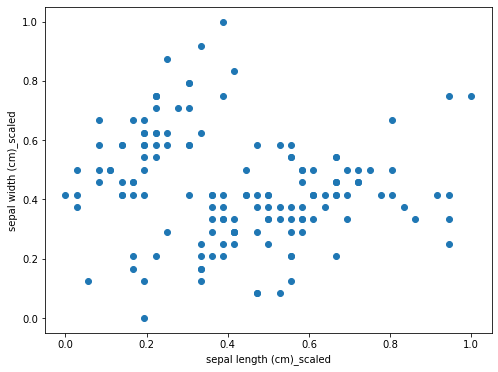

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(df[['sepal length (cm)_scaled']], df[['sepal width (cm)_scaled']])
plt.xlabel('sepal length (cm)_scaled')
plt.ylabel('sepal width (cm)_scaled')
plt.show()

In [7]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['sepal length (cm)_scaled', 'sepal width (cm)_scaled']])
    sse.append(km.inertia_)
    
sse

[12.797757201646089,
 6.855290526033278,
 4.115194202754065,
 3.217483856523378,
 2.5590863842109304,
 2.0977320719736006,
 1.8464868577730311,
 1.5610815894219126,
 1.281479458293645]

<function matplotlib.pyplot.show(close=None, block=None)>

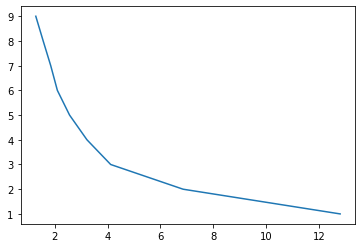

In [8]:
plt.plot(sse, k_range)
plt.show

In [9]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(df[['sepal length (cm)_scaled', 'sepal width (cm)_scaled']])

### Table Presentation

In [10]:
df['Labels'] =y_pred
df.head(20)

,sepal length (cm),sepal width (cm),sepal length (cm)_scaled,sepal width (cm)_scaled,Labels
0,5.1,3.5,0.222222,0.625000,0
1,4.9,3.0,0.166667,0.416667,3
2,4.7,3.2,0.111111,0.500000,3
3,4.6,3.1,0.083333,0.458333,3
4,5.0,3.6,0.194444,0.666667,0
5,5.4,3.9,0.305556,0.791667,0
6,4.6,3.4,0.083333,0.583333,0
7,5.0,3.4,0.194444,0.583333,0
8,4.4,2.9,0.027778,0.375000,3
9,4.9,3.1,0.166667,0.458333,3


In [16]:
df['Labels'].value_counts()

Labels
1    52
2    40
0    34
3    24
Name: count, dtype: int64

In [17]:
km.cluster_centers_

array([[0.24836601, 0.67647059],
       [0.45940171, 0.29887821],
       [0.71597222, 0.46979167],
       [0.13888889, 0.36458333]])

In [12]:
cl1 = df[df['Labels'] == 0]
cl2 = df[df['Labels'] == 1]
cl3 = df[df['Labels'] == 2]
cl4 = df[df['Labels'] == 3]

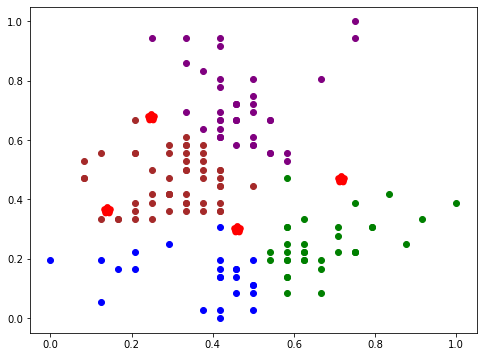

In [38]:
# plt.scatter(cl1, cl2)
plt.figure(figsize=(8, 6))
plt.scatter(cl1['sepal width (cm)_scaled'], cl1['sepal length (cm)_scaled'], color='green')
plt.scatter(cl2['sepal width (cm)_scaled'], cl2['sepal length (cm)_scaled'], color='brown')
plt.scatter(cl3['sepal width (cm)_scaled'], cl3['sepal length (cm)_scaled'], color='purple')
plt.scatter(cl4['sepal width (cm)_scaled'], cl4['sepal length (cm)_scaled'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', linewidths=7, color='red', )
plt.show()